In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
import dlib
import pickle

In [2]:
labels_data = pd.read_csv('labels/AllLabels.csv')
labels_data.head()

,ClipID,Boredom,Engagement,Confusion,Frustration
0,1100011002.avi,0,2,0,0
1,1100011003.avi,0,2,0,0
2,1100011004.avi,0,3,0,0
3,1100011005.avi,0,3,0,0
4,1100011006.avi,0,3,0,0


In [3]:
def getLabeledData(dataPath):
    detector = dlib.get_frontal_face_detector()
    dataset = os.listdir(dataPath)

    frames = []
    labels = []
    for ttv in dataset:
        users = os.listdir(dataPath+ttv+'/')
        for user in users:
            currUser = os.listdir(dataPath+ttv+'/'+user+'/')
            for extract in currUser:
                clip = os.listdir(dataPath+ttv+'/'+user+'/'+extract+'/')

                for imagepath in clip:
                    if imagepath[-3:] != 'jpg':
                        continue
                    image = cv2.imread(dataPath+ttv+'/'+user+'/'+extract+'/'+imagepath)

                    faces = detector(image)
                    l = len(faces)
                    for face in faces:
                        x1 = face.left()
                        y1 = face.top()
                        x2 = face.right()
                        y2 = face.bottom()
                        roi = cv2.resize(image[y1:y2,x1:x2],(224,224))

                        frames.append(roi)
                        labels.append(int(labels_data.loc[labels_data['ClipID'] == clip[0], 'Engagement']))
                    if l==0:
                        frames.append(cv2.resize(image,(224,224)))
                        labels.append(int(labels_data.loc[labels_data['ClipID'] == clip[0], 'Engagement']))

    frames = np.asarray(frames)
    labels = np.asarray(labels)
    return frames, labels

In [4]:
def savePickle(fileName, data):
    with open(fileName, 'wb') as f:
        pickle.dump(data, f)

In [5]:
def loadPickle(fileName):
    with open(fileName, 'rb') as f:
        return pickle.load(f)

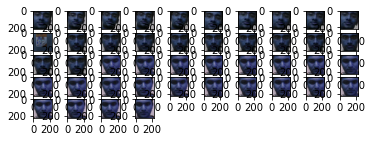

In [8]:
frames, labels = getLabeledData('C:/Users/Omar/Data/')
savePickle('frames.pkl',frames)
savePickle('labels.pkl',labels)
for i in range(1,len(frames)):
    plt.subplot(10,10,i)
    plt.imshow(frames[i])

In [9]:
frames = loadPickle('frames.pkl')
labels = loadPickle('labels.pkl')